In [1]:
#Project goals: Using the properties data, create different models and choose the best one to predict 
# the taxvaluedollarcnt
#Methods used: Linear Regression, Ridge Regression, Lasso Regressoin, Feature Selection, KNN Regression 

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn import neighbors,tree,naive_bayes
from IPython.display import display
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
from sklearn import feature_selection, cross_validation
from sklearn.metrics import mean_absolute_error

In [3]:
# Change working directory
os.chdir('/Users/brittanyciura/Downloads')

In [31]:
# Read in data set
house = pd.read_csv("properties_2017.csv")

In [32]:
# Full dataset shape
house.shape

(2985217, 58)

In [33]:
# descriptive statistics
house.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
parcelid,2.98522e+06,NaN,NaN,NaN,1.33259e+07,7.90997e+06,1.07117e+07,1.16437e+07,1.25451e+07,1.40971e+07,1.69602e+08
airconditioningtypeid,815362,NaN,NaN,NaN,1.94572,3.16051,1,1,1,1,13
architecturalstyletypeid,6061,NaN,NaN,NaN,7.20261,2.43629,2,7,7,7,27
basementsqft,1627,NaN,NaN,NaN,647.221,538.787,20,272,535,847.5,8516
bathroomcnt,2.98226e+06,NaN,NaN,NaN,2.2162,1.07825,0,2,2,3,32
bedroomcnt,2.98227e+06,NaN,NaN,NaN,3.09336,1.27157,0,2,3,4,25
buildingclasstypeid,12731,NaN,NaN,NaN,3.73474,0.500371,1,3,4,4,5
buildingqualitytypeid,1.9414e+06,NaN,NaN,NaN,6.28082,1.72992,1,5,6,8,12
calculatedbathnbr,2.86806e+06,NaN,NaN,NaN,2.30383,1.00324,1,2,2,3,32
decktypeid,17379,NaN,NaN,NaN,66,0,66,66,66,66,66


In [34]:
# get data types 
house.dtypes

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


In [35]:
#Data Processing (53 numeric variables and 5 category variables)
#All attributes are numeric except :fireplaceflag, hashottuborspa, propertycountylandusecode, propertyzoningdesc,taxdelinquencyflag

In [36]:
#Checking Missing Value: 
MissingCol = house.columns[house.isnull().any()].tolist()

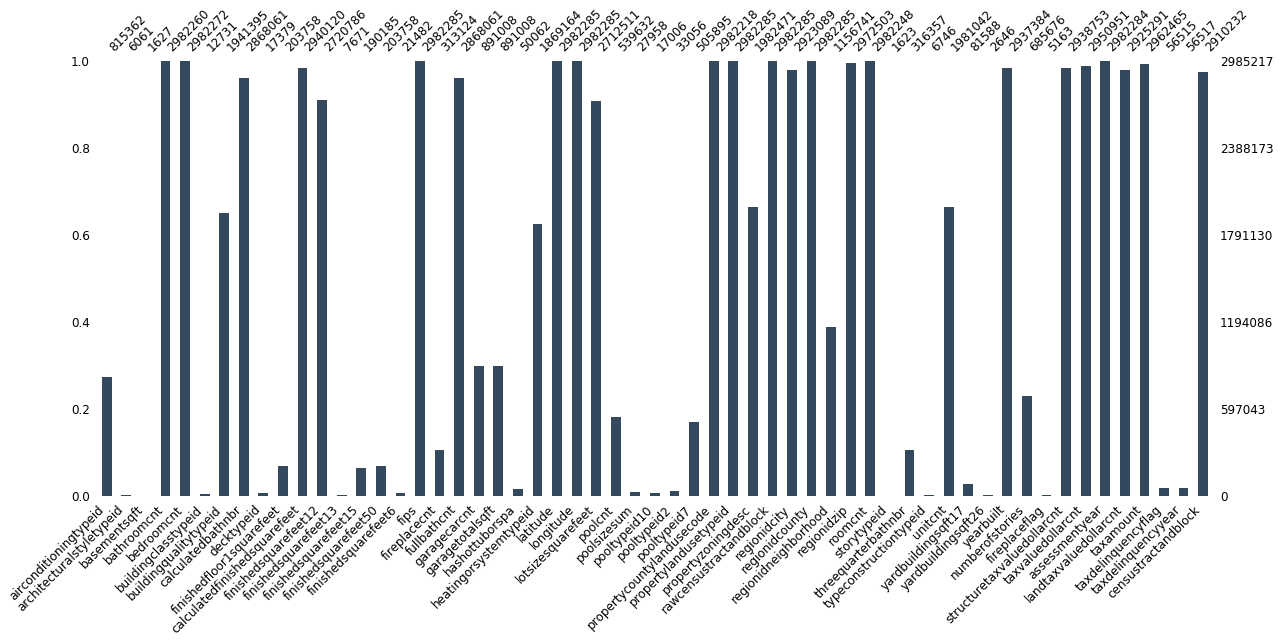

In [37]:
#bar plot of the number of instances for each feature
msno.bar(house[MissingCol],figsize=(20,8), color = "#34495e", fontsize = 12, labels = True,)

In [38]:
#remove columns with less than 2,000,000 records, but keep poolcnt, garagecnt, and numberofstories
# remove fips, propertycountylandusecode, rawcensustractandblock, and censustractandblock
#new data frame with 23 columns
house = house[["bathroomcnt","bedroomcnt","calculatedbathnbr","calculatedfinishedsquarefeet",
               "finishedsquarefeet12","fullbathcnt","latitude","longitude","lotsizesquarefeet",
               "propertylandusetypeid","regionidcounty","poolcnt","garagecarcnt","numberofstories",
               "regionidcity","regionidzip",
               "roomcnt","yearbuilt","taxvaluedollarcnt","structuretaxvaluedollarcnt",
               "landtaxvaluedollarcnt","taxamount","assessmentyear"]]

In [39]:
# house shape with selected attributes
house.shape

(2985217, 23)

In [40]:
#Change the data type for categorical features to object
for col in ["propertylandusetypeid",
           "regionidcounty","regionidcity",
            "regionidzip","yearbuilt","assessmentyear",]:
    house[col] = house[col].astype('object')

In [41]:
house.dtypes

bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fullbathcnt                     float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertylandusetypeid            object
regionidcounty                   object
poolcnt                         float64
garagecarcnt                    float64
numberofstories                 float64
regionidcity                     object
regionidzip                      object
roomcnt                         float64
yearbuilt                        object
taxvaluedollarcnt               float64
structuretaxvaluedollarcnt      float64
landtaxvaluedollarcnt           float64
taxamount                       float64
assessmentyear                   object
dtype: object

In [42]:
col = house.columns.tolist()
len(col)

23

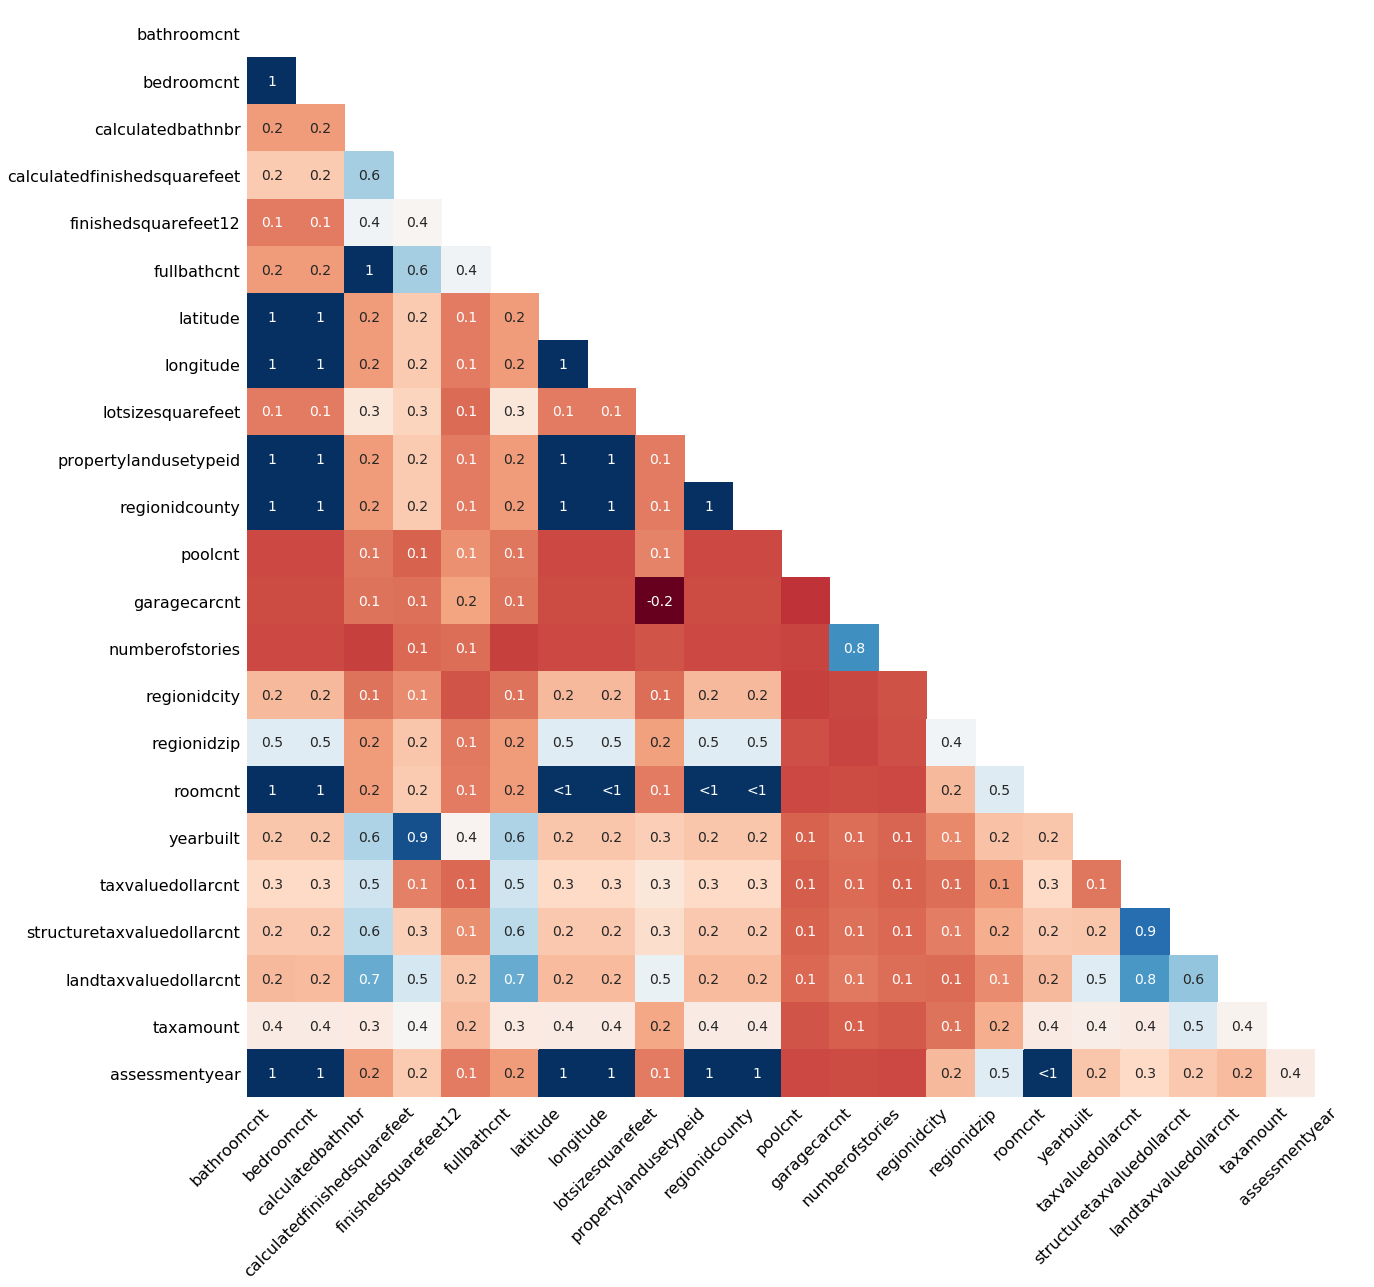

In [43]:
#check the correlation between each col
msno.heatmap(house[col],figsize=(20,20))

In [44]:
# Create correlation matrix
corr_matrix = house.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

In [45]:
print(to_drop)

['calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']


In [46]:
# drop highly correlated variables greater than 0.7
df = house.drop(house[to_drop],axis = 1)

In [47]:
df.shape

(2985217, 17)

In [48]:
# descriptive statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
bathroomcnt,2982260.0,NaN,NaN,NaN,2.216196e+00,1.078250,0.0,2.0,2.0,3.0,32.0
bedroomcnt,2982272.0,NaN,NaN,NaN,3.093362e+00,1.271569,0.0,2.0,3.0,4.0,25.0
calculatedfinishedsquarefeet,2940120.0,NaN,NaN,NaN,1.831455e+03,1954.198051,1.0,1215.0,1574.0,2140.0,952576.0
latitude,2982285.0,NaN,NaN,NaN,3.400131e+07,243515.706879,33324388.0,33827400.0,34008074.0,34161856.0,34819650.0
longitude,2982285.0,NaN,NaN,NaN,-1.182017e+08,345591.772190,-119475780.0,-118392899.0,-118172091.0,-117948920.0,-117554316.0
lotsizesquarefeet,2712511.0,NaN,NaN,NaN,2.260376e+04,249983.626731,100.0,5683.0,7000.0,9893.0,371000512.0
propertylandusetypeid,2982285.0,16.0,261.0,2152863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
regionidcounty,2982285.0,3.0,3101.0,2012741.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poolcnt,539632.0,NaN,NaN,NaN,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
garagecarcnt,891008.0,NaN,NaN,NaN,1.826581e+00,0.608934,0.0,2.0,2.0,2.0,25.0


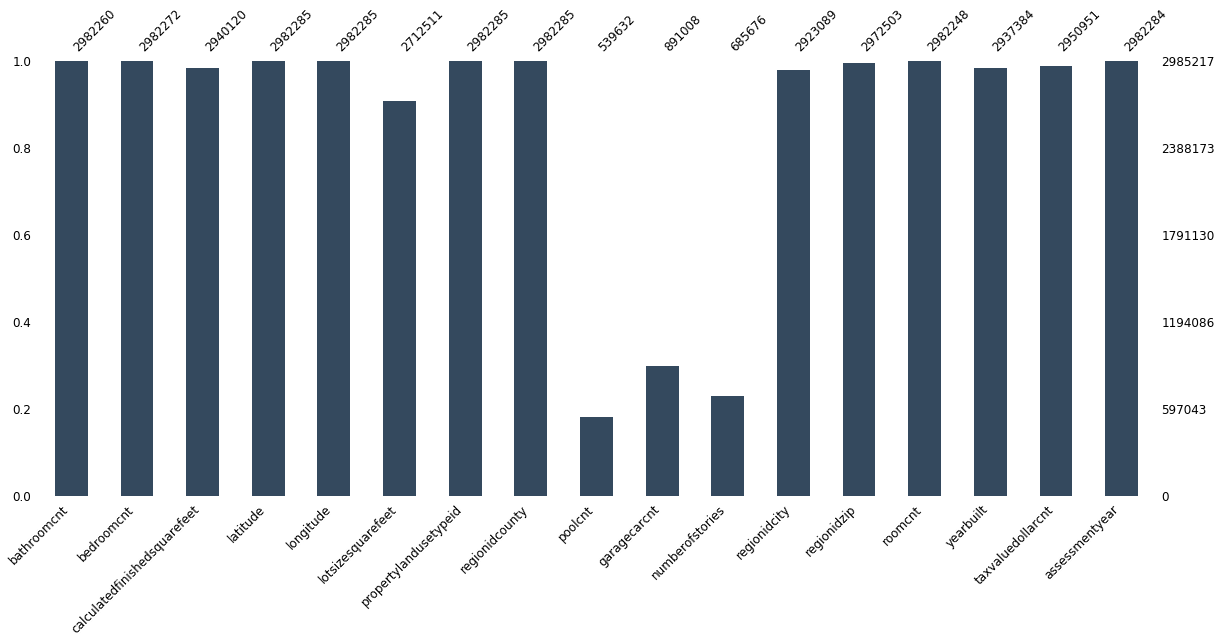

In [49]:
#plot the number of instances we have so far for each feature
msno.bar(df,figsize=(20,8), color = "#34495e", fontsize = 12, labels = True,)

In [50]:
#fill in the missing values
df = df.dropna(axis = 0, how = "all") #drop rows with all missing values
df = df.dropna(subset = ["taxvaluedollarcnt","calculatedfinishedsquarefeet"]) #drop rows without these variables 
df["lotsizesquarefeet"].fillna(df["calculatedfinishedsquarefeet"],axis=0, inplace = True)
df["bathroomcnt"].fillna(1,axis = 0, inplace = True)
df["bedroomcnt"].fillna(0, axis = 0, inplace = True)
df["roomcnt"].fillna(1, axis = 0, inplace = True)
df["poolcnt"].fillna(0,axis = 0, inplace = True)
df["garagecarcnt"].fillna(0,axis =0, inplace = True)
df["numberofstories"].fillna(1, axis = 0, inplace = True)

In [51]:
# Check for missing values
df.isnull().sum()

bathroomcnt                         0
bedroomcnt                          0
calculatedfinishedsquarefeet        0
latitude                            0
longitude                           0
lotsizesquarefeet                   0
propertylandusetypeid               0
regionidcounty                      0
poolcnt                             0
garagecarcnt                        0
numberofstories                     0
regionidcity                    53159
regionidzip                      6471
roomcnt                             0
yearbuilt                        4486
taxvaluedollarcnt                   0
assessmentyear                      0
dtype: int64

In [52]:
# drop rows with missing values for regionidcity, regionidzip, and yearbuilt
df = df.dropna(axis = 0)

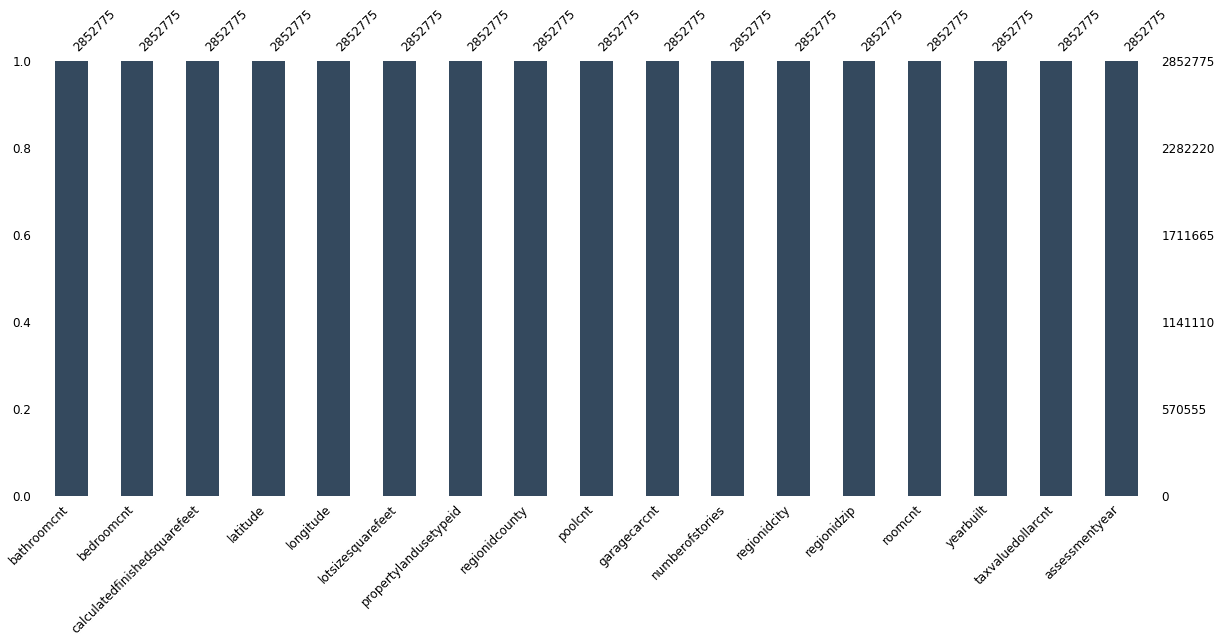

In [53]:
#show the final dataset 
msno.bar(df,figsize=(20,8), color = "#34495e", fontsize = 12, labels = True,)

In [54]:
df.shape

(2852775, 17)

In [55]:
# confirm there are no more missing values
df.isnull().sum()

bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertylandusetypeid           0
regionidcounty                  0
poolcnt                         0
garagecarcnt                    0
numberofstories                 0
regionidcity                    0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
taxvaluedollarcnt               0
assessmentyear                  0
dtype: int64

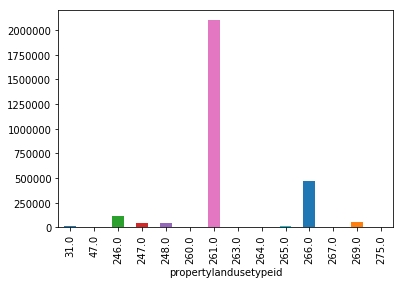

In [56]:
##PropertyLandUseTypeID count by id
import matplotlib.pyplot as plt
%matplotlib inline
plot = df.groupby('propertylandusetypeid').size().plot(kind='bar')

Since most of the filtered properties are in land use type id 261, we will only use these data points for our analysis.

In [57]:
#261 : Single Family Residential
df = df[df.propertylandusetypeid == 261]

In [58]:
# shape of dataframe with only single family residential - 261
df.shape

(2103447, 17)

In [59]:
df.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,regionidcounty,poolcnt,garagecarcnt,numberofstories,regionidcity,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,assessmentyear
20,2.0,4.0,3633.0,34560018.0,-118169806.0,9826.0,261,3101,0.0,0.0,1.0,40227,97329,0.0,2005,296425.0,2016
31,4.0,3.0,1620.0,33996200.0,-118438000.0,1620.0,261,3101,0.0,0.0,1.0,12447,96047,0.0,2011,847770.0,2016
33,2.0,3.0,2077.0,34012977.0,-118479243.0,6490.0,261,3101,0.0,0.0,1.0,26964,96152,0.0,1926,646760.0,2016
62,0.0,0.0,1200.0,34097714.0,-118248712.0,4054.0,261,3101,0.0,0.0,1.0,12447,96020,0.0,1972,5328.0,2016
97,0.0,0.0,171.0,33770827.0,-118156513.0,13002.0,261,3101,0.0,0.0,1.0,46298,96246,0.0,1973,6920.0,2016


In [60]:
#Remove feature propertylandusetypeid since we only get data for 261
df = df.drop("propertylandusetypeid",axis = 1)

In [61]:
df.shape

(2103447, 16)

In [62]:
# Create 3 bins for yearbuilt, and drop original yearbuilt variable
df["yearBin"] = pd.cut(df["yearbuilt"],[0,1952,1966,2016])
df = df.drop("yearbuilt", axis = 1)

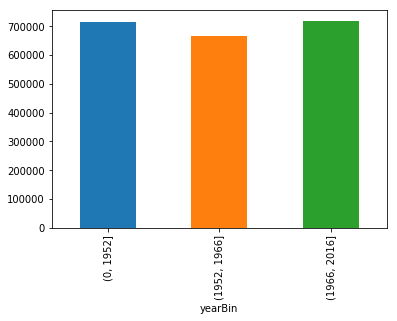

In [63]:
#plot the distribution between year bins and size
plot = df.groupby('yearBin').size().plot(kind='bar')

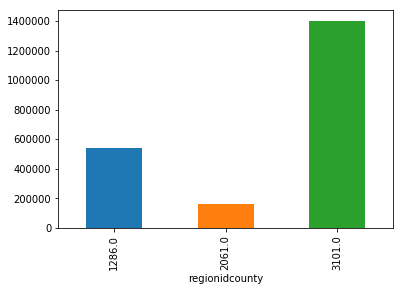

In [64]:
#Bar chart by regionId County
plot = df.groupby('regionidcounty').size().plot(kind='bar')

Text(0.5,0,'taxValue')

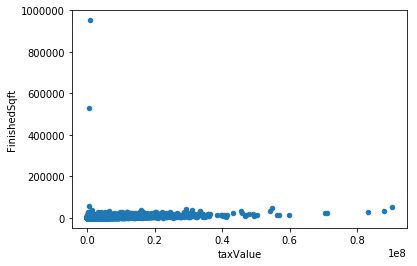

In [65]:
# scatter plot of calculatedfinishedsquarefeet vs. taxvaluedollarcnt
df.plot(x="taxvaluedollarcnt", y="calculatedfinishedsquarefeet", kind="scatter")
plt.ylabel('FinishedSqft')
plt.xlabel('taxValue')

In [66]:
##Remove rows with calculatedfinishedsquarefeet greater than 200,000 because that is either an error or unrealistic
df.drop(df[df.calculatedfinishedsquarefeet > 200000].index, inplace=True)
df.shape

(2103445, 16)

Text(0.5,0,'taxValue')

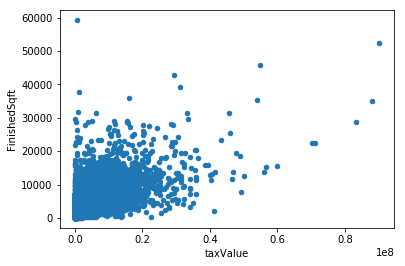

In [67]:
##Redo scatter plot
df.plot(x="taxvaluedollarcnt", y="calculatedfinishedsquarefeet", kind="scatter")
plt.ylabel('FinishedSqft')
plt.xlabel('taxValue')

In [68]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
bathroomcnt,2.10344e+06,NaN,NaN,NaN,2.23255,0.986227,0,2,2,3,32
bedroomcnt,2.10344e+06,NaN,NaN,NaN,3.29713,0.930785,0,3,3,4,25
calculatedfinishedsquarefeet,2.10344e+06,NaN,NaN,NaN,1854.96,962.857,1,1256,1618,2195,59220
latitude,2.10344e+06,NaN,NaN,NaN,3.40063e+07,246350,3.33399e+07,3.38331e+07,3.40029e+07,3.41686e+07,3.48196e+07
longitude,2.10344e+06,NaN,NaN,NaN,-1.18191e+08,342713,-1.19476e+08,-1.18382e+08,-1.18145e+08,-1.17944e+08,-1.17571e+08
lotsizesquarefeet,2.10344e+06,NaN,NaN,NaN,10638.3,266508,104,5610,6750,8500,3.71001e+08
regionidcounty,2.10344e+06,3,3101,1.40121e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
poolcnt,2.10344e+06,NaN,NaN,NaN,0.192234,0.394056,0,0,0,0,1
garagecarcnt,2.10344e+06,NaN,NaN,NaN,0.628418,0.959768,0,0,0,2,25
numberofstories,2.10344e+06,NaN,NaN,NaN,1.10706,0.331577,1,1,1,1,41


In [69]:
##Drop outliers for TaxValueDollarCount greater than 1,000,000
df.drop(df[df.taxvaluedollarcnt > 1000000].index, inplace=True)
df.shape

(1954998, 16)

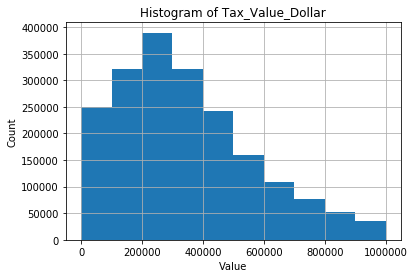

In [70]:
import math
#logvalue = math.log(df['taxvaluedollarcnt'])
plt.hist(df['taxvaluedollarcnt'], bins=10 )
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Histogram of Tax_Value_Dollar')
#plt.axis([0, 10000000, 0, 400000])
plt.grid(True)
plt.show()

<Figure size 864x864 with 0 Axes>

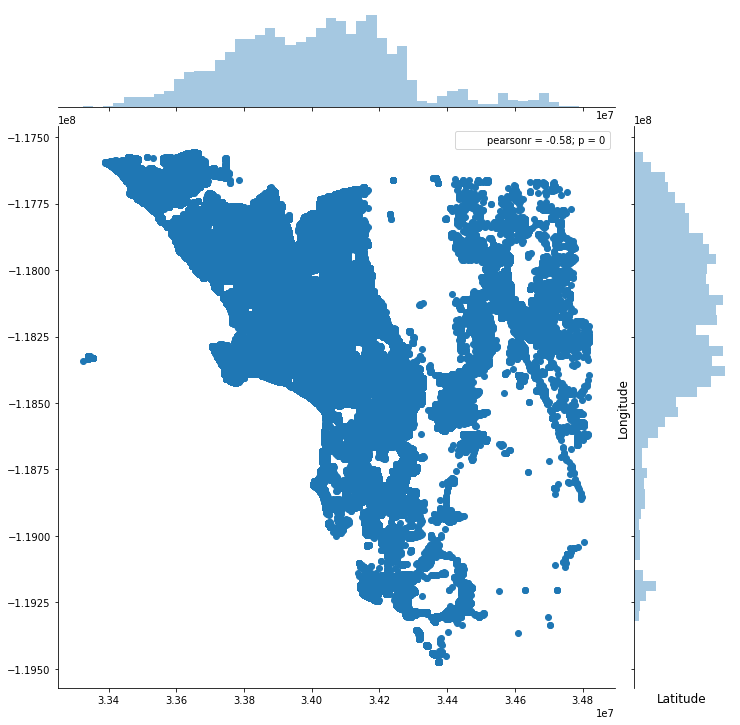

In [71]:
# plot latitude and longitude
import seaborn as sns
house['latitude'] = house['latitude'].astype('float64')
house['longitude'] = house['longitude'].astype('float64')
color = sns.color_palette()
plt.figure(figsize=(12,12))
sns.jointplot(x=house["latitude"].values, y=house["longitude"].values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [72]:
##Output cleaned data to be used for analysis
df.to_csv('house_clean_data.csv',sep=',', index=False)

In [74]:
df.shape

(1954998, 16)

In [73]:
df = pd.read_csv('house_clean_data.csv')

y = df["taxvaluedollarcnt"]
x = df.drop(['taxvaluedollarcnt'], axis=1)
print(x.head())

   bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet    latitude  \
0          2.0         4.0                        3633.0  34560018.0   
1          4.0         3.0                        1620.0  33996200.0   
2          2.0         3.0                        2077.0  34012977.0   
3          0.0         0.0                        1200.0  34097714.0   
4          0.0         0.0                         171.0  33770827.0   

     longitude  lotsizesquarefeet  regionidcounty  poolcnt  garagecarcnt  \
0 -118169806.0             9826.0          3101.0      0.0           0.0   
1 -118438000.0             1620.0          3101.0      0.0           0.0   
2 -118479243.0             6490.0          3101.0      0.0           0.0   
3 -118248712.0             4054.0          3101.0      0.0           0.0   
4 -118156513.0            13002.0          3101.0      0.0           0.0   

   numberofstories  regionidcity  regionidzip  roomcnt  assessmentyear  \
0              1.0       40227.0    

In [75]:
print(y.head())

0    296425.0
1    847770.0
2    646760.0
3      5328.0
4      6920.0
Name: taxvaluedollarcnt, dtype: float64


In [76]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
bathroomcnt,1.955e+06,NaN,NaN,NaN,2.10767,0.804369,0,2,2,2.5,20
bedroomcnt,1.955e+06,NaN,NaN,NaN,3.24079,0.888276,0,3,3,4,16
calculatedfinishedsquarefeet,1.955e+06,NaN,NaN,NaN,1716.86,688.258,1,1235,1570,2060,59220
latitude,1.955e+06,NaN,NaN,NaN,3.4012e+07,246468,3.33399e+07,3.38371e+07,3.40002e+07,3.4175e+07,3.48196e+07
longitude,1.955e+06,NaN,NaN,NaN,-1.18189e+08,341766,-1.19476e+08,-1.18369e+08,-1.18139e+08,-1.17947e+08,-1.17571e+08
lotsizesquarefeet,1.955e+06,NaN,NaN,NaN,9754.19,74765.9,104,5570,6661.5,8182,2.84309e+07
regionidcounty,1.955e+06,NaN,NaN,NaN,2560.82,790.478,1286,1286,3101,3101,3101
poolcnt,1.955e+06,NaN,NaN,NaN,0.170947,0.376463,0,0,0,0,1
garagecarcnt,1.955e+06,NaN,NaN,NaN,0.610176,0.921102,0,0,0,2,15
numberofstories,1.955e+06,NaN,NaN,NaN,1.10682,0.330408,1,1,1,1,41


In [77]:
# create dataframe with numeric attributes to use for kmeans clustering
df_num = df[["bathroomcnt","bedroomcnt","calculatedfinishedsquarefeet","latitude","longitude","lotsizesquarefeet",
            "roomcnt","taxvaluedollarcnt","poolcnt","garagecarcnt","numberofstories"]]
# create a random sample of 10% of the dataset
df_sample = df_num.sample(frac = 0.1)
df_sample.shape

(195500, 11)

In [78]:
from sklearn.cluster import KMeans 
from sklearn import preprocessing
# normalize df_sample with min-max normalization from 0-1
min_max_scaler = preprocessing.MinMaxScaler().fit(df_sample)
data_norm = min_max_scaler.transform(df_sample)

# Kmeans clustering with 6 clusters
kmeans = KMeans(n_clusters=6, max_iter=100, verbose=1) # initialization
kmeans.fit(data_norm)

clusters = kmeans.predict(data_norm)
print(clusters) 

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 19705.474209152668
start iteration
done sorting
end inner loop
Iteration 1, inertia 18460.460603314557
start iteration
done sorting
end inner loop
Iteration 2, inertia 18156.008403178865
start iteration
done sorting
end inner loop
Iteration 3, inertia 18049.32457410086
start iteration
done sorting
end inner loop
Iteration 4, inertia 17996.496052480165
start iteration
done sorting
end inner loop
Iteration 5, inertia 17947.688380317166
start iteration
done sorting
end inner loop
Iteration 6, inertia 17874.02332299513
start iteration
done sorting
end inner loop
Iteration 7, inertia 17757.41140215588
start iteration
done sorting
end inner loop
Iteration 8, inertia 17598.206357385712
start iteration
done sorting
end inner loop
Iteration 9, inertia 17410.147333884175
start iteration
done sorting
end inner loop
Iteration 10, inertia 17243.60607917236
start iteration
done sorting
end inner loop
Iteration 1

Iteration 5, inertia 16023.778956458695
start iteration
done sorting
end inner loop
Iteration 6, inertia 16016.168524567192
start iteration
done sorting
end inner loop
Iteration 7, inertia 16013.08286431576
start iteration
done sorting
end inner loop
Iteration 8, inertia 16011.670042945661
start iteration
done sorting
end inner loop
Iteration 9, inertia 16010.979870600275
start iteration
done sorting
end inner loop
Iteration 10, inertia 16010.647752109639
start iteration
done sorting
end inner loop
Iteration 11, inertia 16010.495648933951
start iteration
done sorting
end inner loop
Iteration 12, inertia 16010.416476808508
start iteration
done sorting
end inner loop
Iteration 13, inertia 16010.373218178403
center shift 1.148035e-03 within tolerance 2.779722e-06
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 18362.123501831837
start iteration
done sorting
end inner loop
Iteration 1, inertia 16668.944338832862
start iteration
done sorting
end inne

In [79]:
np.unique(clusters)

array([0, 1, 2, 3, 4, 5], dtype=int32)

Text(0,0.5,'Finished Square Feet')

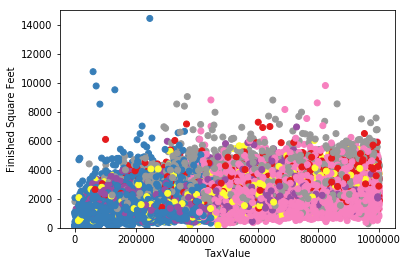

In [82]:
# Plot outputs - calculatedfinishedsquarefeet vs. taxvaluedollarcnt
%matplotlib inline
import pylab as pl
plt.scatter(df_sample["taxvaluedollarcnt"],df_sample['calculatedfinishedsquarefeet'].values, c=clusters, cmap='Set1')
plt.ylim(0, 15000)
plt.xlabel('TaxValue')
plt.ylabel('Finished Square Feet')

Text(0,0.5,'Longitude')

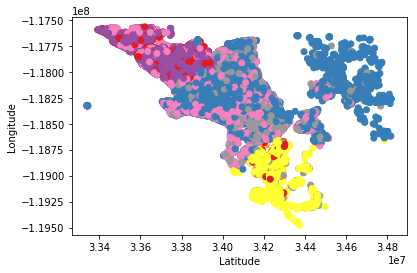

In [83]:
# Plot outputs - longitude vs. latitude
%matplotlib inline
import pylab as pl
plt.scatter(df_sample['latitude'].values, df_sample['longitude'].values, c=clusters, cmap='Set1')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

Text(0,0.5,'Tax Value')

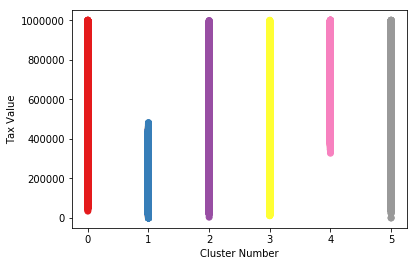

In [84]:
# Plot outputs - taxvaluedollarcnt vs cluster number
%matplotlib inline
import pylab as pl
plt.scatter(clusters, df_sample["taxvaluedollarcnt"], c=clusters, cmap='Set1')
plt.xlabel('Cluster Number')
plt.ylabel('Tax Value')

## Linear Regression

In [213]:
##Split out our target variable
y = df["taxvaluedollarcnt"]
x = df.drop("taxvaluedollarcnt", axis=1)
print(x.head())

   bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet    latitude  \
0          2.0         4.0                        3633.0  34560018.0   
1          4.0         3.0                        1620.0  33996200.0   
2          2.0         3.0                        2077.0  34012977.0   
3          0.0         0.0                        1200.0  34097714.0   
4          0.0         0.0                         171.0  33770827.0   

     longitude  lotsizesquarefeet  regionidcounty  poolcnt  garagecarcnt  \
0 -118169806.0             9826.0          3101.0      0.0           0.0   
1 -118438000.0             1620.0          3101.0      0.0           0.0   
2 -118479243.0             6490.0          3101.0      0.0           0.0   
3 -118248712.0             4054.0          3101.0      0.0           0.0   
4 -118156513.0            13002.0          3101.0      0.0           0.0   

   numberofstories  regionidcity  regionidzip  roomcnt  assessmentyear  \
0              1.0       40227.0    

In [214]:
#drop regionidcity and regionidzip
x = x.drop(["regionidcity","regionidzip"], axis = 1)

x.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
bathroomcnt,1.955e+06,NaN,NaN,NaN,2.10767,0.804369,0,2,2,2.5,20
bedroomcnt,1.955e+06,NaN,NaN,NaN,3.24079,0.888276,0,3,3,4,16
calculatedfinishedsquarefeet,1.955e+06,NaN,NaN,NaN,1716.86,688.258,1,1235,1570,2060,59220
latitude,1.955e+06,NaN,NaN,NaN,3.4012e+07,246468,3.33399e+07,3.38371e+07,3.40002e+07,3.4175e+07,3.48196e+07
longitude,1.955e+06,NaN,NaN,NaN,-1.18189e+08,341766,-1.19476e+08,-1.18369e+08,-1.18139e+08,-1.17947e+08,-1.17571e+08
lotsizesquarefeet,1.955e+06,NaN,NaN,NaN,9754.19,74765.9,104,5570,6661.5,8182,2.84309e+07
regionidcounty,1.955e+06,NaN,NaN,NaN,2560.82,790.478,1286,1286,3101,3101,3101
poolcnt,1.955e+06,NaN,NaN,NaN,0.170947,0.376463,0,0,0,0,1
garagecarcnt,1.955e+06,NaN,NaN,NaN,0.610176,0.921102,0,0,0,2,15
numberofstories,1.955e+06,NaN,NaN,NaN,1.10682,0.330408,1,1,1,1,41


In [215]:
# change data type for regionidcounty and assessmentyear to object so that we can create dummy variables
x["regionidcounty"] = x["regionidcounty"].astype('object')
x["assessmentyear"] = x["assessmentyear"].astype('object')

In [216]:
x.dtypes

bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
regionidcounty                   object
poolcnt                         float64
garagecarcnt                    float64
numberofstories                 float64
roomcnt                         float64
assessmentyear                   object
yearBin                          object
dtype: object

In [217]:
# get dummy variables for categorical variables, then set the data type to int
x = pd.get_dummies(x)  
x = x.astype(int)

In [218]:
x.dtypes

bathroomcnt                     int64
bedroomcnt                      int64
calculatedfinishedsquarefeet    int64
latitude                        int64
longitude                       int64
lotsizesquarefeet               int64
poolcnt                         int64
garagecarcnt                    int64
numberofstories                 int64
roomcnt                         int64
regionidcounty_1286.0           int64
regionidcounty_2061.0           int64
regionidcounty_3101.0           int64
assessmentyear_2015.0           int64
assessmentyear_2016.0           int64
yearBin_(0, 1952]               int64
yearBin_(1952, 1966]            int64
yearBin_(1966, 2016]            int64
dtype: object

In [219]:
x.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,garagecarcnt,numberofstories,roomcnt,regionidcounty_1286.0,regionidcounty_2061.0,regionidcounty_3101.0,assessmentyear_2015.0,assessmentyear_2016.0,"yearBin_(0, 1952]","yearBin_(1952, 1966]","yearBin_(1966, 2016]"
0,2,4,3633,34560018,-118169806,9826,0,0,1,0,0,0,1,0,1,0,0,1
1,4,3,1620,33996200,-118438000,1620,0,0,1,0,0,0,1,0,1,0,0,1
2,2,3,2077,34012977,-118479243,6490,0,0,1,0,0,0,1,0,1,1,0,0
3,0,0,1200,34097714,-118248712,4054,0,0,1,0,0,0,1,0,1,0,0,1
4,0,0,171,33770827,-118156513,13002,0,0,1,0,0,0,1,0,1,0,0,1


In [220]:
x.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
bathroomcnt,1954998.0,2.058511e+00,0.792761,0.0,2.000000e+00,2.0,2.0,20.0
bedroomcnt,1954998.0,3.240792e+00,0.888276,0.0,3.000000e+00,3.0,4.0,16.0
calculatedfinishedsquarefeet,1954998.0,1.716858e+03,688.257578,1.0,1.235000e+03,1570.0,2060.0,59220.0
latitude,1954998.0,3.401201e+07,246468.055960,33339912.0,3.383712e+07,34000172.5,34174979.0,34819650.0
longitude,1954998.0,-1.181891e+08,341765.798498,-119475691.0,-1.183686e+08,-118139458.0,-117947293.0,-117571021.0
lotsizesquarefeet,1954998.0,9.754186e+03,74765.850370,104.0,5.570000e+03,6661.5,8182.0,28430904.0
poolcnt,1954998.0,1.709470e-01,0.376463,0.0,0.000000e+00,0.0,0.0,1.0
garagecarcnt,1954998.0,6.101756e-01,0.921102,0.0,0.000000e+00,0.0,2.0,15.0
numberofstories,1954998.0,1.106819e+00,0.330408,1.0,1.000000e+00,1.0,1.0,41.0
roomcnt,1954998.0,1.916624e+00,3.127063,0.0,0.000000e+00,0.0,5.0,86.0


In [93]:
# Separate train and test data sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)

In [94]:
# get dimensions of train and test sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1563998, 18)
(1563998,)
(391000, 18)
(391000,)


In [98]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Create linear regression object
linreg = LinearRegression()

# Feature Seleciton

Percentile: 	 MAE:
1 		 -153445.49092569854
4 		 -153445.49092569854
7 		 -153369.2571081868
10 		 -153369.2571081868
13 		 -153258.10893287623
16 		 -153258.10893287623
19 		 -152789.95215248514
22 		 -152789.95215248514
25 		 -151606.63740350184
28 		 -151606.63740350184
31 		 -151200.03796054499
34 		 -151200.03796054499
37 		 -151164.21500882582
40 		 -151164.21500882582
43 		 -151147.101714726
46 		 -151147.101714726
49 		 -150953.03279590813
52 		 -150953.03279590813
55 		 -148429.14843358457
58 		 -148429.14843358457
61 		 -148344.64145048644
64 		 -148344.64145048644
67 		 -147565.7179489773
70 		 -147565.7179489773
73 		 -147565.71794899763
76 		 -147565.71794899763
79 		 -147565.7179490019
82 		 -147565.7179490019
85 		 -146692.49090227063
88 		 -146692.49090227063
91 		 -146689.63506511916
94 		 -146689.63506511916
97 		 -146689.63506509442
100 		 -146689.7199952375
Optimal percentile of features:97 

Optimal number of features:17 



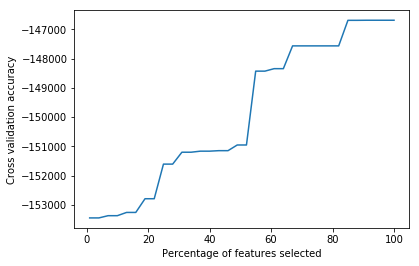

In [101]:
# Feature Selection
def feature(data, target, model):
    percentiles = range(1, 101, 3)
    results = []
    print('Percentile: \t MAE:')
    for i in range(1, 101, 3):
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
        X_train_fs = fs.fit_transform(data, target)
        scores = cross_validation.cross_val_score(model, X_train_fs, target, cv=5, scoring='neg_mean_absolute_error')
        print (i, '\t\t', scores.mean())
        results = np.append(results, scores.mean())

    optimal_percentile = max(np.where(results == results.max())[0])
    print ("Optimal percentile of features:{0}".format(percentiles[int(optimal_percentile)]), "\n")
    optimal_num_features = int(percentiles[int(optimal_percentile)]*len(data.columns)/100)
    print ("Optimal number of features:{0}".format(optimal_num_features), "\n")

    # Plot percentile of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Percentage of features selected")
    plt.ylabel("Cross validation accuracy")
    plt.plot(percentiles,results)
    
feature(x_train, y_train, linreg)

In [102]:
# Show the list of most informative variables and their weights
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile= 97)
X_train_fs = fs.fit_transform(x_train, y_train)
print('Variable: \t\t\t Weight:')
for j in range(len(x_train.columns.values)):
    if fs.get_support()[j]:
        print (x_train.columns.values[j],'\t\t\t', fs.scores_[j])

Variable: 			 Weight:
bathroomcnt 			 279176.96538265387
bedroomcnt 			 99161.95723523064
calculatedfinishedsquarefeet 			 458470.3359719037
latitude 			 32222.393535794203
longitude 			 236.28394801454817
poolcnt 			 58475.84697995763
garagecarcnt 			 65834.03376923551
numberofstories 			 26232.160521852464
roomcnt 			 15797.683731906287
regionidcounty_1286.0 			 38129.165806724915
regionidcounty_2061.0 			 4010.7589368229237
regionidcounty_3101.0 			 47309.516509302186
assessmentyear_2015.0 			 35.63279484561845
assessmentyear_2016.0 			 35.63279484740297
yearBin_(0, 1952] 			 37206.21877892104
yearBin_(1952, 1966] 			 15112.015493245386
yearBin_(1966, 2016] 			 107136.69961429191


In [103]:
# feature selection selected all of the features except for lotsizesquarefeet

In [104]:
x_train.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
bathroomcnt,1563998.0,2.058371e+00,0.792699,0.0,2.0,2.0,2.000000e+00,20.0
bedroomcnt,1563998.0,3.240534e+00,0.888216,0.0,3.0,3.0,4.000000e+00,16.0
calculatedfinishedsquarefeet,1563998.0,1.716770e+03,688.812113,1.0,1234.0,1570.0,2.060000e+03,59220.0
latitude,1563998.0,3.401204e+07,246486.086639,33339912.0,33837149.0,34000249.5,3.417501e+07,34819650.0
longitude,1563998.0,-1.181892e+08,341848.996985,-119475391.0,-118368684.0,-118139494.5,-1.179472e+08,-117571110.0
lotsizesquarefeet,1563998.0,9.737784e+03,74654.147075,105.0,5570.0,6662.0,8.184000e+03,28430904.0
poolcnt,1563998.0,1.710558e-01,0.376558,0.0,0.0,0.0,0.000000e+00,1.0
garagecarcnt,1563998.0,6.103966e-01,0.921311,0.0,0.0,0.0,2.000000e+00,15.0
numberofstories,1563998.0,1.106918e+00,0.330873,1.0,1.0,1.0,1.000000e+00,41.0
roomcnt,1563998.0,1.917534e+00,3.127567,0.0,0.0,0.0,5.000000e+00,86.0


In [143]:
# drop lotsizesquarefeet based on feature selection
x_train_fsel = x_train.drop(["lotsizesquarefeet"], axis = 1)

In [144]:
x_train_fsel.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,poolcnt,garagecarcnt,numberofstories,roomcnt,regionidcounty_1286.0,regionidcounty_2061.0,regionidcounty_3101.0,assessmentyear_2015.0,assessmentyear_2016.0,"yearBin_(0, 1952]","yearBin_(1952, 1966]","yearBin_(1966, 2016]"
579179,2,3,1221,33889411,-118309785,0,0,1,0,0,0,1,0,1,0,1,0
273307,3,3,1846,33953761,-118333404,0,0,1,0,0,0,1,0,1,0,0,1
1592906,2,3,1832,33472483,-117697642,0,2,1,0,1,0,0,0,1,0,0,1
395380,2,3,1148,33905909,-118148758,0,0,1,0,0,0,1,0,1,1,0,0
904503,1,2,1176,33822553,-118175106,0,0,1,0,0,0,1,0,1,1,0,0


In [145]:
# add column of ones
x_train_fsel.insert(0,'ones',1)
x_train_fsel.head()

,ones,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,poolcnt,garagecarcnt,numberofstories,roomcnt,regionidcounty_1286.0,regionidcounty_2061.0,regionidcounty_3101.0,assessmentyear_2015.0,assessmentyear_2016.0,"yearBin_(0, 1952]","yearBin_(1952, 1966]","yearBin_(1966, 2016]"
579179,1,2,3,1221,33889411,-118309785,0,0,1,0,0,0,1,0,1,0,1,0
273307,1,3,3,1846,33953761,-118333404,0,0,1,0,0,0,1,0,1,0,0,1
1592906,1,2,3,1832,33472483,-117697642,0,2,1,0,1,0,0,0,1,0,0,1
395380,1,2,3,1148,33905909,-118148758,0,0,1,0,0,0,1,0,1,1,0,0
904503,1,1,2,1176,33822553,-118175106,0,0,1,0,0,0,1,0,1,1,0,0


In [146]:
x_train_fsel.shape

(1563998, 18)

In [157]:
# OLS Regression
import statsmodels.api as sm

model = sm.OLS(y_train, x_train_fsel).fit()
predictions = model.predict(x_train_fsel)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxvaluedollarcnt   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                 4.416e+04
Date:                Sun, 18 Nov 2018   Prob (F-statistic):               0.00
Time:                        23:01:35   Log-Likelihood:            -2.1191e+07
No. Observations:             1563998   AIC:                         4.238e+07
Df Residuals:                 1563983   BIC:                         4.238e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
ones                         -2.111e+06   4.33e+04    -48.782      0.000    -2.2e+06   -2.03e+06
bathroomcnt                   3.147e+04    311.202    101.125      0.000    3.09e+04    3.21e+04
bedroomcnt                   -1.873e+04    228.857    -81.831      0.000   -1.92e+04   -1.83e+04
calculatedfinishedsquarefeet   123.0677      0.369    333.414      0.000     122.344     123.791
latitude                        -0.1722      0.001   -198.521      0.000      -0.174      -0.171
longitude                       -0.0899      0.001   -111.441      0.000      -0.091      -0.088
poolcnt                       4.758e+04    415.888    114.414      0.000    4.68e+04    4.84e+04
garagecarcnt                  1.544e+04    493.371     31.288      0.000    1.45e+04    1.64e+04
numberofstories               1.017e+04    571.599     17.800      0.000    9054.166    1.13e+04
roomcnt                      -1.513e+04    112.713   -134.234      0.000   -1.54e+04   -1.49e+04
regionidcounty_1286.0        -6.741e+05    1.4e+04    -48.037      0.000   -7.02e+05   -6.47e+05
regionidcounty_2061.0        -6.908e+05   1.49e+04    -46.212      0.000    -7.2e+05   -6.61e+05
regionidcounty_3101.0        -7.459e+05   1.43e+04    -52.067      0.000   -7.74e+05   -7.18e+05
assessmentyear_2015.0        -1.015e+06   2.22e+04    -45.770      0.000   -1.06e+06   -9.72e+05
assessmentyear_2016.0        -1.096e+06   2.18e+04    -50.215      0.000   -1.14e+06   -1.05e+06
yearBin_(0, 1952]            -7.032e+05   1.44e+04    -48.666      0.000   -7.32e+05   -6.75e+05
yearBin_(1952, 1966]         -7.215e+05   1.44e+04    -49.981      0.000    -7.5e+05   -6.93e+05
yearBin_(1966, 2016]         -6.861e+05   1.44e+04    -47.673      0.000   -7.14e+05   -6.58e+05
==============================================================================
Omnibus:                   112740.735   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           261236.628
Skew:                           0.456   Prob(JB):                         0.00
Kurtosis:                       4.782   Cond. No.                     3.44e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.99e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [158]:
# print coefficients
print(model.params)

ones                           -2.110837e+06
bathroomcnt                     3.147030e+04
bedroomcnt                     -1.872772e+04
calculatedfinishedsquarefeet    1.230677e+02
latitude                       -1.722094e-01
longitude                      -8.986117e-02
poolcnt                         4.758356e+04
garagecarcnt                    1.543651e+04
numberofstories                 1.017448e+04
roomcnt                        -1.512998e+04
regionidcounty_1286.0          -6.741389e+05
regionidcounty_2061.0          -6.907607e+05
regionidcounty_3101.0          -7.459373e+05
assessmentyear_2015.0          -1.015332e+06
assessmentyear_2016.0          -1.095505e+06
yearBin_(0, 1952]              -7.032273e+05
yearBin_(1952, 1966]           -7.215113e+05
yearBin_(1966, 2016]           -6.860983e+05
dtype: float64


In [159]:
# Compute train RMSE
err = abs(predictions - y_train)
total_error = np.dot(err,err)

rmse_train_OLS = np.sqrt(total_error/len(predictions))
print ("RMSE Train OLS: " , rmse_train_OLS)

RMSE Train OLS:  185462.63233440783


In [163]:
# drop lotsizesquarefeet from x_test bassd on feature selection
x_test_fsel = x_test.drop(["lotsizesquarefeet"], axis = 1)
x_test_fsel.insert(0,'ones',1)
x_test_fsel.head()

,ones,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,poolcnt,garagecarcnt,numberofstories,roomcnt,regionidcounty_1286.0,regionidcounty_2061.0,regionidcounty_3101.0,assessmentyear_2015.0,assessmentyear_2016.0,"yearBin_(0, 1952]","yearBin_(1952, 1966]","yearBin_(1966, 2016]"
730762,1,3,4,2781,33782788,-117817798,1,2,2,9,1,0,0,0,1,0,1,0
442680,1,1,3,1066,34033525,-118428837,0,0,1,0,0,0,1,0,1,1,0,0
49897,1,1,2,783,34178743,-118510088,0,0,1,0,0,0,1,0,1,1,0,0
1269025,1,2,3,1600,33676321,-117921727,0,2,1,6,1,0,0,0,1,0,1,0
566457,1,2,4,1296,34217418,-118556732,0,0,1,0,0,0,1,0,1,0,1,0


In [164]:
x_test_fsel.shape

(391000, 18)

In [162]:
# Applying OLS Regression to test set
predictions2 = model.predict(x_test_fsel)

err = abs(predictions2 - y_test)
total_error = np.dot(err,err)

# Compute RMSE
rmse_test_OLS = np.sqrt(total_error/len(predictions2))
print ("RMSE Test: " , rmse_test_OLS)

RMSE Test:  185148.15373884424


In [165]:
# Train the linreg model using the training sets
linreg.fit(x_train_fsel, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [166]:
# We can view the regression coefficients
print ('Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [ 0.00000000e+00  3.14703025e+04 -1.87277244e+04  1.23067692e+02
 -1.72209401e-01 -8.98611729e-02  4.75835599e+04  1.54365110e+04
  1.01744795e+04 -1.51299832e+04  2.94734412e+04  1.28515940e+04
 -4.23250352e+04  4.00868815e+04 -4.00868815e+04  3.85020642e+02
 -1.78989954e+04  1.75139748e+04]


In [168]:
# Compute RMSE on training data
p = linreg.predict(x_train_fsel)

# Now we can constuct a vector of errors
err = abs(p-y_train)

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print ("RMSE Train: " , rmse_train)

RMSE Train:  185462.6323344079


In [169]:
print ("R-Squared Train:" , linreg.score(x_train_fsel, y_train))

R-Squared Train: 0.28330404509344587


In [170]:
# Compute RMSE on test data
p = linreg.predict(x_test_fsel)

# Now we can constuct a vector of errors
err = abs(p-y_test)

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Compute RMSE
rmse_test = np.sqrt(total_error/len(p))
print ("RMSE Test: " , rmse_test)

RMSE Test:  185148.15373902195


In [171]:
print ("R-Squared Test:" , linreg.score(x_test_fsel, y_test))

R-Squared Test: 0.28590346086438734


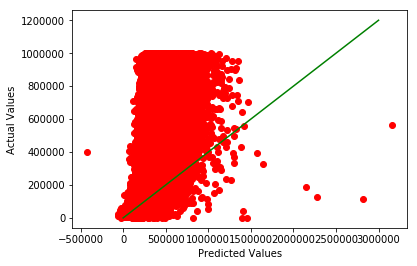

In [177]:
# Plot the correlation between the predicted and actual values of the target attribute for test set
%matplotlib inline
pl.plot(p, y_test,'ro')
pl.plot([0,3000000],[0,1200000], 'g-')
pl.xlabel('Predicted Values')
pl.ylabel('Actual Values')
pl.show()

# Ridge

In [179]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Grid search
ridge = Ridge()

parameters = {
    'alpha': np.linspace(0.0001, 10, 50)
}

gs = GridSearchCV(ridge, parameters, verbose=1, cv=5)

In [181]:
gs.fit(x_train, y_train)
%time _ = gs.fit(x_train, y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.7min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.7min finished


CPU times: user 3min 33s, sys: 1min 25s, total: 4min 59s
Wall time: 2min 42s


({'alpha': 3.265373469387755}, 0.28326887249660376)

In [199]:
# Create ridge regression object with alpha 3.265 from grid search
ridge = Ridge(fit_intercept=True, alpha=3.265)

Percentile: 	 MAE:
1 		 -153445.49092572954
4 		 -153445.49092572954
7 		 -153369.25632290266
10 		 -153369.25632290266
13 		 -153258.10624001877
16 		 -153258.10624001877
19 		 -152789.94835957716
22 		 -152789.94835957716
25 		 -151606.63626481994
28 		 -151606.63626481994
31 		 -151200.03851154455
34 		 -151200.03851154455
37 		 -151164.21581217326
40 		 -151164.21581217326
43 		 -151147.10004307088
46 		 -151147.10004307088
49 		 -150953.0266676255
52 		 -150953.0266676255
55 		 -148429.1730080053
58 		 -148429.1730080053
61 		 -148344.668493467
64 		 -148344.668493467
67 		 -147565.7880459389
70 		 -147565.7880459389
73 		 -147565.79306725124
76 		 -147565.79306725124
79 		 -147565.74329838663
82 		 -147565.74329838663
85 		 -146692.49183365703
88 		 -146692.49183365703
91 		 -146689.63195185154
94 		 -146689.63195185154
97 		 -146689.63397095888
100 		 -146689.7189029635
Optimal percentile of features:94 

Optimal number of features:16 



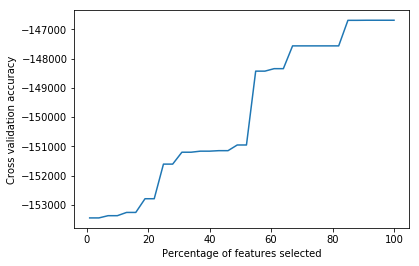

In [184]:
#feature selection 
feature(x_train, y_train, ridge)

In [185]:
# Show the list of most informative variables and their weights
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile= 94)
X_train_fs = fs.fit_transform(x_train, y_train)
print('Variable: \t\t\t Weight:')
for j in range(len(x_train.columns.values)):
    if fs.get_support()[j]:
        print (x_train.columns.values[j],'\t\t\t', fs.scores_[j])

Variable: 			 Weight:
bathroomcnt 			 279176.96538265387
bedroomcnt 			 99161.95723523064
calculatedfinishedsquarefeet 			 458470.3359719037
latitude 			 32222.393535794203
longitude 			 236.28394801454817
poolcnt 			 58475.84697995763
garagecarcnt 			 65834.03376923551
numberofstories 			 26232.160521852464
roomcnt 			 15797.683731906287
regionidcounty_1286.0 			 38129.165806724915
regionidcounty_2061.0 			 4010.7589368229237
regionidcounty_3101.0 			 47309.516509302186
assessmentyear_2016.0 			 35.63279484740297
yearBin_(0, 1952] 			 37206.21877892104
yearBin_(1952, 1966] 			 15112.015493245386
yearBin_(1966, 2016] 			 107136.69961429191


In [187]:
x_rid = x_train.drop(["lotsizesquarefeet","assessmentyear_2015.0"], axis = 1)
x_rid.shape

(1563998, 16)

In [188]:
#fit Ridge Model
ridge.fit(x_rid, y_train)
p = ridge.predict(x_rid)

In [189]:
# Compute RMSE on training data
err = p-y_train
total_error = np.dot(err,err)
rmse = np.sqrt(total_error/len(p))

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on Ridge training: %.4f' %rmse)

Method: Ridge Regression
RMSE on Ridge training: 185462.6326


In [190]:
# Applying Ridge Regression to test set
x_rid_test = x_test.drop(["lotsizesquarefeet","assessmentyear_2015.0"], axis = 1)
p2_rid = ridge.predict(x_rid_test)

err = p2_rid-y_test
total_error = np.dot(err,err)
rmse = np.sqrt(total_error/len(p2_rid))

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on Ridge Test: %.4f' %rmse)

Method: Ridge Regression
RMSE on Ridge Test: 185148.1409


In [194]:
# training set R-squared
print ("R-Squared Train Ridge:" , ridge.score(x_rid, y_train))

R-Squared Train Ridge: 0.2833040434119045


In [195]:
# test set R-squared
print ("R-Squared Test Ridge:" , ridge.score(x_rid_test, y_test))

R-Squared Test Ridge: 0.28590355981621507


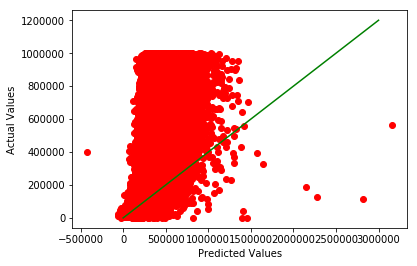

In [192]:
# Plot the correlation between the predicted and actual values of the target attribute for test set
pl.plot(p2_rid, y_test,'ro')
pl.plot([0,3000000],[0,1200000], 'g-')
pl.xlabel('Predicted Values')
pl.ylabel('Actual Values')
pl.show()

# Lasso 

In [196]:
# Grid search
lasso = Lasso()

parameters = {
    'alpha': np.linspace(0.0001, 10, 50)
}

gs = GridSearchCV(ridge, parameters, verbose=1, cv=5)

In [198]:
gs.fit(x_train, y_train)
%time _ = gs.fit(x_train, y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.9min finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  2.8min finished


CPU times: user 3min 32s, sys: 1min 26s, total: 4min 59s
Wall time: 2min 46s


({'alpha': 3.265373469387755}, 0.28326887249660376)

In [200]:
# Create lasso regression object with alpha 3.265 from grid search
lasso = Lasso(fit_intercept=True, alpha=3.265)

Percentile: 	 MAE:
1 		 -153445.49118169173
4 		 -153445.49118169173
7 		 -153369.21057651492
10 		 -153369.21057651492
13 		 -153257.9712037839
16 		 -153257.9712037839
19 		 -152789.7773228373
22 		 -152789.7773228373
25 		 -151606.48989320855
28 		 -151606.48989320855
31 		 -151199.9596392476
34 		 -151199.9596392476
37 		 -151164.18216984294
40 		 -151164.18216984294
43 		 -151147.0662583904
46 		 -151147.0662583904
49 		 -150952.853320911
52 		 -150952.853320911
55 		 -148429.6345826492
58 		 -148429.6345826492
61 		 -148345.15317250948
64 		 -148345.15317250948
67 		 -147566.38546936825
70 		 -147566.38546936825
73 		 -147566.51181249128
76 		 -147566.51181249128
79 		 -147565.93122444343
82 		 -147565.93122444343
85 		 -146692.48920323802
88 		 -146692.48920323802
91 		 -146689.6228251552
94 		 -146689.6228251552
97 		 -146689.62282515527
100 		 -146689.70774540544
Optimal percentile of features:94 

Optimal number of features:16 



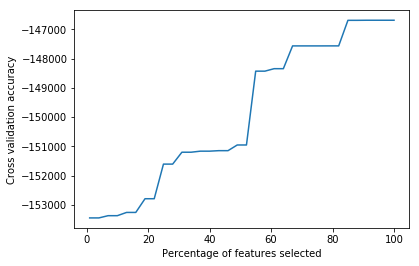

In [201]:
#feature selection
feature(x_train, y_train,lasso)

In [202]:
# Show the list of most informative variables and their weights
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile= 94)
X_train_fs = fs.fit_transform(x_train, y_train)
print('Variable: \t\t\t Weight:')
for j in range(len(x_train.columns.values)):
    if fs.get_support()[j]:
        print (x_train.columns.values[j],'\t\t\t', fs.scores_[j])

Variable: 			 Weight:
bathroomcnt 			 279176.96538265387
bedroomcnt 			 99161.95723523064
calculatedfinishedsquarefeet 			 458470.3359719037
latitude 			 32222.393535794203
longitude 			 236.28394801454817
poolcnt 			 58475.84697995763
garagecarcnt 			 65834.03376923551
numberofstories 			 26232.160521852464
roomcnt 			 15797.683731906287
regionidcounty_1286.0 			 38129.165806724915
regionidcounty_2061.0 			 4010.7589368229237
regionidcounty_3101.0 			 47309.516509302186
assessmentyear_2016.0 			 35.63279484740297
yearBin_(0, 1952] 			 37206.21877892104
yearBin_(1952, 1966] 			 15112.015493245386
yearBin_(1966, 2016] 			 107136.69961429191


In [203]:
# drop lotsizesquarefeet and assessmentyear_2015.0
x_lasso = x_train.drop(["lotsizesquarefeet","assessmentyear_2015.0"], axis = 1)
x_lasso.shape

(1563998, 16)

In [204]:
x_lasso.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,poolcnt,garagecarcnt,numberofstories,roomcnt,regionidcounty_1286.0,regionidcounty_2061.0,regionidcounty_3101.0,assessmentyear_2016.0,"yearBin_(0, 1952]","yearBin_(1952, 1966]","yearBin_(1966, 2016]"
579179,2,3,1221,33889411,-118309785,0,0,1,0,0,0,1,1,0,1,0
273307,3,3,1846,33953761,-118333404,0,0,1,0,0,0,1,1,0,0,1
1592906,2,3,1832,33472483,-117697642,0,2,1,0,1,0,0,1,0,0,1
395380,2,3,1148,33905909,-118148758,0,0,1,0,0,0,1,1,1,0,0
904503,1,2,1176,33822553,-118175106,0,0,1,0,0,0,1,1,1,0,0


In [205]:
#fit Lasso Model
lasso.fit(x_lasso, y_train)
p = lasso.predict(x_lasso)

In [206]:
# Compute RMSE on training data
err = p-y_train
total_error = np.dot(err,err)
rmse = np.sqrt(total_error/len(p))

method_name = 'Lasso Regression'
print('Method: %s' %method_name)
print('RMSE on Lasso Training: %.4f' %rmse)

Method: Lasso Regression
RMSE on Lasso Training: 185462.7183


In [207]:
# Applying lasso Regression to test set
x_lasso_test = x_test.drop(["lotsizesquarefeet","assessmentyear_2015.0"], axis = 1)
p2_lasso = lasso.predict(x_lasso_test)

err = p2_lasso - y_test
total_error = np.dot(err,err)
rmse = np.sqrt(total_error/len(p2_lasso))

method_name = 'Lasso Regression'
print('Method: %s' %method_name)
print('RMSE on Lasso Test: %.4f' %rmse)

Method: Lasso Regression
RMSE on Lasso Test: 185148.0015


In [208]:
# training set R-squared
print ("R-Squared Train Lasso:" , lasso.score(x_lasso, y_train))

R-Squared Train Lasso: 0.28330338100173225


In [209]:
# test set R-squared
print ("R-Squared Test Lasso:" , lasso.score(x_lasso_test, y_test))

R-Squared Test Lasso: 0.28590463534631616


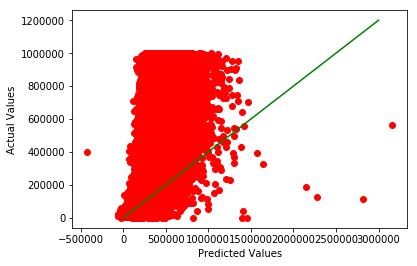

In [210]:
# Plot the correlation between the predicted and actual values of the target attribute for test set
pl.plot(p2_lasso, y_test,'ro')
pl.plot([0,3000000],[0,1200000], 'g-')
pl.xlabel('Predicted Values')
pl.ylabel('Actual Values')
pl.show()

## KNN Regression

In [221]:
print(x.shape)
x.head()

(1954998, 18)


,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,garagecarcnt,numberofstories,roomcnt,regionidcounty_1286.0,regionidcounty_2061.0,regionidcounty_3101.0,assessmentyear_2015.0,assessmentyear_2016.0,"yearBin_(0, 1952]","yearBin_(1952, 1966]","yearBin_(1966, 2016]"
0,2,4,3633,34560018,-118169806,9826,0,0,1,0,0,0,1,0,1,0,0,1
1,4,3,1620,33996200,-118438000,1620,0,0,1,0,0,0,1,0,1,0,0,1
2,2,3,2077,34012977,-118479243,6490,0,0,1,0,0,0,1,0,1,1,0,0
3,0,0,1200,34097714,-118248712,4054,0,0,1,0,0,0,1,0,1,0,0,1
4,0,0,171,33770827,-118156513,13002,0,0,1,0,0,0,1,0,1,0,0,1


In [222]:
y.shape

(1954998,)

In [223]:
full = pd.concat([x, y], axis=1)
full.shape

(1954998, 19)

In [225]:
# full dataset for KNN Regression
full.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,poolcnt,garagecarcnt,numberofstories,roomcnt,regionidcounty_1286.0,regionidcounty_2061.0,regionidcounty_3101.0,assessmentyear_2015.0,assessmentyear_2016.0,"yearBin_(0, 1952]","yearBin_(1952, 1966]","yearBin_(1966, 2016]",taxvaluedollarcnt
0,2,4,3633,34560018,-118169806,9826,0,0,1,0,0,0,1,0,1,0,0,1,296425.0
1,4,3,1620,33996200,-118438000,1620,0,0,1,0,0,0,1,0,1,0,0,1,847770.0
2,2,3,2077,34012977,-118479243,6490,0,0,1,0,0,0,1,0,1,1,0,0,646760.0
3,0,0,1200,34097714,-118248712,4054,0,0,1,0,0,0,1,0,1,0,0,1,5328.0
4,0,0,171,33770827,-118156513,13002,0,0,1,0,0,0,1,0,1,0,0,1,6920.0


In [226]:
# get a random sample of 10% of the full dataset
sample = full.sample(frac = 0.1)

In [227]:
sample.shape

(195500, 19)

In [228]:
##Split out our target variable
target = sample.taxvaluedollarcnt
data = sample.drop(['taxvaluedollarcnt'], axis = 1)

In [229]:
print(target.shape)
print(data.shape)

(195500,)
(195500, 18)


In [230]:
# Normalize data between 0 and 1
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler().fit(data)
data_norm = min_max_scaler.transform(data)

In [231]:
data_norm

array([[0.05555556, 0.125     , 0.05362195, ..., 1.        , 0.        ,
        0.        ],
       [0.11111111, 0.25      , 0.10520429, ..., 0.        , 1.        ,
        0.        ],
       [0.11111111, 0.1875    , 0.10323048, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.11111111, 0.1875    , 0.08849266, ..., 1.        , 0.        ,
        0.        ],
       [0.11111111, 0.1875    , 0.12665307, ..., 1.        , 0.        ,
        0.        ],
       [0.11111111, 0.125     , 0.11481018, ..., 0.        , 0.        ,
        1.        ]])

In [232]:
# Separate sample into training and test data sets
x_train, x_test, y_train, y_test = train_test_split(data_norm, target, test_size=0.2, random_state=33)

In [233]:
# function that returns the R-Squared and RMSE of the test set for KNN Regression 
from sklearn.neighbors import KNeighborsRegressor
def results(x_train, y_train, x_test, y_test, k, distance):
    'returns the number of neighbors, R-squared, and test RMSE for a KNN Regressor'
    knnR = KNeighborsRegressor(n_neighbors=k, weights='distance', metric=distance)
    knnR.fit(x_train, y_train) 
    accuracy = knnR.score(x_test, y_test)
    p = knnR.predict(x_test)
    err = abs(p-y_test)
    total_error = np.dot(err,err)
    rmse_test = np.sqrt(total_error/len(p))
    return accuracy, rmse_test

In [234]:
# function that prints the R-squared and RMSE of the test set for various vlaues of K 
import pylab as pl
def table(x_train, y_train, x_test, y_test, max_K):
    '''returns KNN Regressor accuracy and test rmse for a range of K using euclidean distance'''
    print('K:\t\tR-Squared:\t\tRMSE Test:')
    k = range(1, max_K + 1)
    r_square = []
    for i in range (1, max_K + 1):
        accuracy, rmse = results(x_train, y_train, x_test, y_test, i, 'euclidean')
        r_square = np.append(r_square, accuracy)
        print('{}\t{}\t{}'.format(i, accuracy, rmse))
    
    max_R2 = int(np.where(r_square == r_square.max())[0])+1
    print ("Maximum R-Squared: {0}".format(max_R2))

    pl.figure()
    pl.xlabel("Value of K")
    pl.ylabel("R-Squared")
    pl.plot(k, r_square)
    return max_R2

K:		R-Squared:		RMSE Test:
1	-0.20691733135080836	242319.45369035937
2	0.06271024392558633	213543.5481785727
3	0.15840944606669294	202348.47955143545
4	0.20565130011064325	196587.14422915957
5	0.23248599878133336	193238.06174009384
6	0.25156059651348295	190821.73545538654
7	0.2658065001660721	188996.94618178008
8	0.27669099050536605	187590.7659387783
9	0.28504616082766965	186504.15886038006
10	0.2917273525470514	185630.67950835061
11	0.29788811629844236	184821.58110457845
12	0.30365948595510994	184060.3956270007
13	0.308024804410684	183482.55659977027
14	0.3112832895658427	183050.04059649186
15	0.31448272965504565	182624.36529099572
16	0.316933288253783	182297.65406213133
17	0.31935135540190174	181974.69967879937
18	0.32145757668003727	181692.92731726146
19	0.32340556470392634	181431.93403012562
20	0.3250719493751779	181208.37190557728
Maximum R-Squared: 20
CPU times: user 28min 3s, sys: 4.86 s, total: 28min 8s
Wall time: 28min 4s


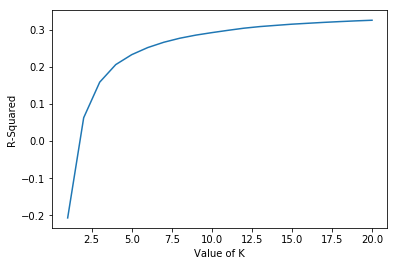

In [235]:
%time _ = table(x_train, y_train, x_test, y_test, 20)

In [236]:
# from the table and graph, choose K = 10
knnR = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='euclidean')
knnR.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

In [237]:
# Compute RMSE on training data
p = knnR.predict(x_train)

# Now we can constuct a vector of errors
err = abs(p-y_train)

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print ("RMSE Train KNN: " , rmse_train)

RMSE Train KNN:  1769.5334065246086


In [238]:
# Compute RMSE on test data
p3 = knnR.predict(x_test)

# Now we can constuct a vector of errors
err = abs(p3-y_test)

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Compute RMSE
rmse_test = np.sqrt(total_error/len(p3))
print ("RMSE Test KNN: " , rmse_test)

RMSE Test KNN:  185630.67950835061


In [239]:
# training set R-squared
print ("R-Squared Train KNN:" , knnR.score(x_train, y_train))

R-Squared Train KNN: 0.999934680192996


In [240]:
# test set R-squared
print ("R-Squared Test KNN:" , knnR.score(x_test, y_test))

R-Squared Test KNN: 0.2917273525470514


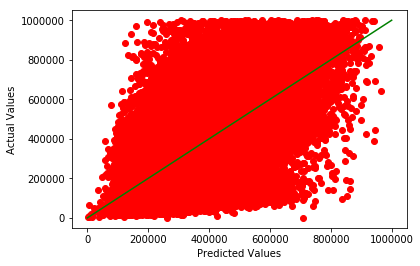

In [254]:
# Plot the correlation between the predicted and actual values of the target attribute for test set
pl.plot(p3, y_test,'ro')
pl.plot([0,1000000],[0,1000000], 'g-')
pl.xlabel('Predicted Values')
pl.ylabel('Actual Values')
pl.show()

In [241]:
# Perform PCA to reduce dimensions
from sklearn import decomposition

In [242]:
# one component
pca = decomposition.PCA(n_components=1)
trans = pca.fit(data_norm).transform(data_norm)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.37899558]
0.3789955842469486


In [243]:
# two components
pca = decomposition.PCA(n_components=2)
trans = pca.fit(data_norm).transform(data_norm)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.37899558 0.23938328]
0.6183788610937773


In [244]:
# three components
pca = decomposition.PCA(n_components=3)
trans = pca.fit(data_norm).transform(data_norm)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.37899558 0.23938328 0.163197  ]
0.7815758632903533


In [245]:
# four components 
pca = decomposition.PCA(n_components=4)
trans = pca.fit(data_norm).transform(data_norm)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.37899558 0.23938328 0.163197   0.10006288]
0.881638740255494


In [247]:
# five components has about 97% of the variance 
pca = decomposition.PCA(n_components=5)
trans = pca.fit(data_norm).transform(data_norm)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.37899558 0.23938328 0.163197   0.10006288 0.09023889]
0.9718776309072


In [248]:
trans

array([[-0.80961763, -0.29345275,  0.34955254, -0.02441284, -0.03255148],
       [-0.19142561,  0.88116102, -0.51985159,  0.65220294,  0.26754389],
       [-0.19369312,  0.88100179, -0.51899896,  0.64868978,  0.27298842],
       ...,
       [-0.82246332, -0.29352726,  0.31352068, -0.05188309,  0.02906425],
       [-0.82041762, -0.2956669 ,  0.30974134, -0.02725877, -0.02430703],
       [ 0.69602091, -0.56253643, -0.50200192, -0.70762214,  0.86053314]])

In [249]:
trans.shape

(195500, 5)

In [250]:
# split lower dimensional transformed data into training and test sets
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(trans, target, test_size=0.2, random_state=33)

K:		R-Squared:		RMSE Test:
1	-0.2205698488269836	243686.1452340238
2	0.058044200405916624	214074.42269123966
3	0.15439625520101385	202830.36309368318
4	0.2038302710170458	196812.35135302236
5	0.23228682337802511	193263.1334470261
6	0.25063747070701303	190939.37903777516
7	0.2649804557702319	189103.23694855667
8	0.2753825452443559	187760.36243332582
9	0.2833812564702963	186721.1875752297
10	0.2903126575033148	185815.9752416501
11	0.2961408134481224	185051.41527543994
12	0.29981222170906663	184568.15983059813
13	0.303758184401299	184047.3509179424
14	0.30742270080333667	183562.36544880446
15	0.3098570391603524	183239.4800035264
16	0.3121751789449757	182931.4771331265
17	0.31390808268313175	182700.89330813
18	0.3158357732018644	182444.0483403951
19	0.3175400768103757	182216.6658472935
20	0.31925602553614446	181987.44268244458
Maximum R-Squared: 20
CPU times: user 26.4 s, sys: 452 ms, total: 26.9 s
Wall time: 21.1 s


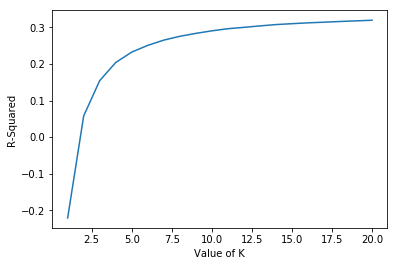

In [251]:
%time _ = table(x_train_pca, y_train_pca, x_test_pca, y_test_pca, 20)

In [252]:
# from the table and graph, choose K = 10
knnR = KNeighborsRegressor(n_neighbors=10, weights='distance', metric='euclidean')
knnR.fit(x_train_pca, y_train_pca)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

In [255]:
# Compute RMSE on training data
p = knnR.predict(x_train_pca)

# Now we can constuct a vector of errors
err = abs(p-y_train_pca)

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print ("RMSE Train KNN_pca: " , rmse_train)

RMSE Train KNN_pca:  1769.5334065246086


In [256]:
# Compute RMSE on test data
p4 = knnR.predict(x_test_pca)

# Now we can constuct a vector of errors
err = abs(p4-y_test_pca)

# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)

# Compute RMSE
rmse_test = np.sqrt(total_error/len(p4))
print ("RMSE Test KNN_pca: " , rmse_test)

RMSE Test KNN_pca:  185815.9752416501


In [257]:
# training set R-squared
print ("R-Squared Train KNN_pca:" , knnR.score(x_train_pca, y_train_pca))

R-Squared Train KNN_pca: 0.999934680192996


In [258]:
# test set R-squared
print ("R-Squared Test KNN_pca:" , knnR.score(x_test_pca, y_test_pca))

R-Squared Test KNN_pca: 0.2903126575033148


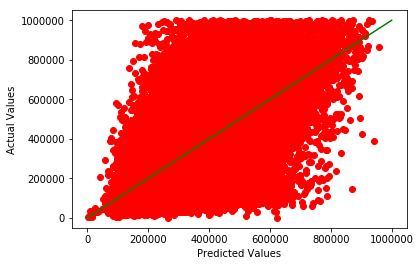

In [260]:
# Plot the correlation between the predicted and actual values of the target attribute for test set
pl.plot(p4, y_test_pca,'ro')
pl.plot([0,1000000],[0,1000000], 'g-')
pl.xlabel('Predicted Values')
pl.ylabel('Actual Values')
pl.show()

In [261]:
# function to display the K nearest neighbors of a new record and its predicted value using KNN Regression
from scipy import spatial
import statistics
def display_knn_pred(x, D, K, measure, values):
    """ find K nearest neighbors of data point x among D and return predicted value and top k neighbors"""
    if measure == 0:
        # euclidean distance
        distances = []
        for row in D:
            distance = spatial.distance.euclidean(x, row)
            distances.append(distance)
    elif measure == 1:
        # cosine distance
        distances = []
        for row in D:
            distance = spatial.distance.cosine(x, row)
            distances.append(distance)
    idx = np.argsort(distances) # the indexes of K nearest neighbors
    kvalues = values[idx[:K]]
    lst = kvalues.tolist()
    prediction = statistics.mean(lst)
    return idx[:K], kvalues, prediction

In [262]:
x_train_arr = np.array(x_train)
y_train_arr = np.array(y_train)
x_test_arr = np.array(x_test)
y_test_arr = np.array(y_test)

In [266]:
# test display_knn_pred with k=10 and euclidean distance
x = x_test_arr[28]
neighbors, neigh_value, pred = display_knn_pred(x, x_train_arr, 10, 0, y_train_arr)
print('Top Neighbors: {}\nTop Neighbor Values: {}\nPredicted Value: {}'.format(neighbors, neigh_value, pred))
print('Actual Value: {}'.format(y_test_arr[28]))

Top Neighbors: [ 96813  84016  35825  44034  19847  90343  85955  74188 151028  78782]
Top Neighbor Values: [302392. 132088.  61255. 308343. 414503. 115103. 154541.  56541. 622500.
  98986.]
Predicted Value: 226625.2
Actual Value: 299490.0


In [268]:
# test display_knn_pred with k=10 and cosine distance
x = x_test_arr[85]
neighbors, neigh_value, pred = display_knn_pred(x, x_train_arr, 10, 1, y_train_arr)
print('Top Neighbors: {}\nTop Neighbor Values: {}\nPredicted Value: {}'.format(neighbors, neigh_value, pred))
print('Actual Value: {}'.format(y_test_arr[85]))

Top Neighbors: [112411 132281  32265  12749 131554 140573 113482 141590  42833  52296]
Top Neighbor Values: [325697. 256041. 344161.  54005.  58231. 121890. 267790. 244753. 492395.
 406000.]
Predicted Value: 257096.3
Actual Value: 222530.0
